# Importanto as libs

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import islice
from datetime import date


import openpyxl
from openpyxl import load_workbook
from openpyxl import Workbook 
from openpyxl.utils.dataframe import dataframe_to_rows

import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

import plotly.express as px

##Classe com vários métodos de pre-processamento de texto em português criado pelo grupo F03
import utils.preprocessing_portuguese as preprossPT
import re

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

import functools
import operator

from numpy import arange

import plotly.io as pio
import psutil

import numpy as np



In [3]:
main_path = "/dados01/workspace/ufmg.f01dcc/m03/business_understanding/notebooks/resultado_m03_meta_classes_extraction/"
if not os.path.exists(os.path.join(main_path, "img-caracterizacao-"+date.today().strftime("%d-%m-%Y")+"/")):
        os.makedirs(os.path.join(main_path, "img-caracterizacao-"+date.today().strftime("%d-%m-%Y")+"/"))


path_dir = "/dados01/workspace/ufmg.f01dcc/m03/business_understanding/notebooks/resultado_m03_meta_classes_extraction/"+"img-caracterizacao-"+date.today().strftime("%d-%m-%Y")+"/"

if not os.path.exists(os.path.join(path_dir, "real_meta_classe/")):
    os.makedirs(os.path.join(path_dir, "real_meta_classe/"))
        
if not os.path.exists(os.path.join(path_dir, "meta_classe/")):
    os.makedirs(os.path.join(path_dir, "meta_classe/"))

if not os.path.exists(os.path.join(path_dir, "real_classe/")):
    os.makedirs(os.path.join(path_dir, "real_classe/"))
        
abas = ["Classes_v3",
        "sao-bento-abade",
       "olaria",
       "coqueiral",
       "cristais",
       "pirapetinga",
       "passa-vinte",
       "arantina",
       "ijaci",
       "itamarati",
       "ribeirao-vermelho"
       ]

# Meta-classe

In [4]:
def gera_graficos_comparativo(df_aux, title):
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    
    total = float(df_aux[0].sum()/2.0)
    
    
    sns_plot = sns.barplot(x=df_aux["class"], y=df_aux[0],hue=df_aux["level_0"], data=df_aux, palette=['#66c3a6', 'LightSalmon'], zorder=100, ci=None)
    
    #sns_plot.set(xlabel="Meta-classe", ylabel = "Quantidade")
    
    sns_plot.set_xlabel("Meta-classe",fontsize=15)
    sns_plot.set_ylabel("Quantidade",fontsize=15)
    
    
    sns_plot.set_title(title)
    
    sns_plot.legend(title="Abordagem", title_fontsize=15, fontsize=15, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    '''for p in sns_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        sns_plot.annotate(percentage, (x, y),ha='center')
        #sns_plot.annotate(y, (x, y),ha='center')'''
        
    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    
    plt.grid(zorder=1)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()
    
    
    sns_plot = sns_plot.get_figure()
    
    #Salvando em alta resolução - dpi=600
    sns_plot.savefig(path_dir+title+"-meta-classe-2abordagens.png", dpi=150)

In [5]:
def gera_graficos(df_aux, title, approach):
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    
    total = float(df_aux["level_0"].sum())
    
    print(df_aux)
    
    
    if approach == "palavras-chave":
        clrs = ['grey' if (x == "Não rotulado") else '#66c3a6' for x in df_aux.sort_values('level_0', ascending = True)["class"]]
        sns_plot = sns.barplot(x=df_aux["class"], y=df_aux["level_0"], data=df_aux, palette=clrs, zorder=100, ci=None, order=df_aux.sort_values('level_0', ascending = True)["class"])
    
        #sns_plot.set(xlabel="Meta-classe abordagem por palavras-chave", ylabel = "Quantidade")
        sns_plot.set_xlabel("Meta-classe abordagem por palavras-chave",fontsize=15)
        sns_plot.set_ylabel("Quantidade",fontsize=15)
    else:
        clrs = ['grey' if (x == "Não rotulado") else 'LightSalmon' for x in df_aux.sort_values('level_0', ascending = True)["real_class"] ]
        sns_plot = sns.barplot(x=df_aux["real_class"], y=df_aux["level_0"], data=df_aux, palette=clrs, zorder=100, ci=None, order=df_aux.sort_values('level_0', ascending = True)["real_class"])
    
        #sns_plot.set(xlabel="Meta-classe abordagem manual", ylabel = "Quantidade")
        sns_plot.set_xlabel("Meta-classe",fontsize=15)
        sns_plot.set_ylabel("Quantidade",fontsize=15)
    
    
    sns_plot.set_title(title)
    
    #sns_plot.legend(title="Abordagem", fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    '''for p in sns_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        sns_plot.annotate(percentage, (x, y),ha='center')
        #sns_plot.annotate(y, (x, y),ha='center')'''

    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        
    plt.grid(zorder=1)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()
    
    
    sns_plot = sns_plot.get_figure()
    
    if approach == "palavras-chave":
        #Salvando em alta resolução - dpi=600
        sns_plot.savefig(path_dir+"meta_classe/"+title+"-"+approach+"-meta-classe.png", dpi=150)
    else:
        sns_plot.savefig(path_dir+"real_meta_classe/"+title+"-"+approach+"-meta-classe.png", dpi=150)

# Leitura dos dados das planilhas

In [21]:
def limpeza_texto(page_text):
    txt_process = preprossPT.TextPreProcessing()
    
    #print(page_text)
    
    if page_text is not np.nan:
    
        page_text = page_text.lower()

        page_text = page_text.strip()

        page_text = txt_process.remove_pronouns(page_text)

        page_text = txt_process.remove_reduced_or_contracted_words(page_text)

        page_text = txt_process.remove_adverbs(page_text)

        page_text = txt_process.remove_special_characters(page_text)

        page_text = txt_process.remove_excessive_spaces(page_text)

        page_text = txt_process.remove_accents(page_text)

        page_text = txt_process.remove_stopwords(page_text)

        page_text = txt_process.remove_symbols_from_numbers(page_text)

        page_text = txt_process.remove_numbers(page_text)

        page_text = txt_process.remove_urls(page_text)

        page_text = txt_process.remove_person_names(page_text)

        #Removendo letras sozinhas no texto
        page_text = re.sub(r'(?:^| )\w(?:$| )', ' ', page_text).strip()

        page_text = page_text.replace("_","")
    
    return page_text

In [22]:
def read_excel():
    file_dir = 'resultado_m03_meta_classes_extraction/resultado_final.xlsx'
    all_sheets = []
    df_classes = pd.DataFrame()

    for sheet in abas:
        df = pd.read_excel(file_dir, sheet_name=sheet)
        df.columns = df.columns.str.lower()
        df.columns = df.columns.str.strip()

        print(sheet)
        
        if sheet == "Classes_v3":
            df_classes = df.dropna(subset=["processed_classes", "final_meta-class"], how="all")
            '''print(df_classes)
            print(df.dropna(subset=["processed_classes", "final_meta-class"], how="any").shape)'''
            
        else:
            all_sheets.append(df)

    # Concatena todos dataframes em apenas um
    df_rotulos = pd.concat(all_sheets)
    # Dropa linhas vazias e reseta o indice
    #df_rotulos.dropna(how='all', subset=['doc_id', 'title', 'city', 'all_matches', 'meta-class',
    #       'real_meta-class', 'real_class', 'key_words', 'obs', 'escaneado'], inplace=True)
    df_rotulos.reset_index(drop=True, inplace=True)
    df_rotulos.head(10)

    #df_classes.head(20)
    
    return df_rotulos, df_classes, all_sheets

df_rotulos, df_classes, all_sheets = read_excel()
print(df_classes)


Classes_v3
sao-bento-abade
olaria


/dados01/workspace/ufmg.f01dcc/py37/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


coqueiral
cristais
pirapetinga
passa-vinte
arantina
ijaci
itamarati
ribeirao-vermelho
    real_meta-class final_meta-class         processed_classes  count  \
0            EDITAL           EDITAL          edital licitacao   1207   
1            OUTROS           OUTROS   contrato administrativo    459   
2               ATA              ATA       ata registro precos    345   
3            EDITAL           EDITAL  edital pregao presencial    341   
4            EDITAL           EDITAL                    edital    277   
..              ...              ...                       ...    ...   
270          OUTROS           OUTROS     cronograma financeiro      1   
271          OUTROS           OUTROS        custo   secretaria      1   
272          OUTROS           OUTROS      custos totais   item      1   
273          OUTROS           OUTROS        decisao impugnacao      1   
274          OUTROS           OUTROS                   cotacao      1   

             final_class validate    

In [30]:
#df_classes = df_classes.dropna()
df_classes = df_classes.rename({'processed_classes': 'real_class'}, axis=1)

display(df_classes.head())

#df_classes['real_class'] = df_classes['real_class'].str.strip()
df_classes['real_class'] = df_classes['real_class'].str.replace("   ", " ")
df_rotulos['real_class'] = df_rotulos['real_class'].str.replace("   ", " ")

#df_classes['real_class'] = df_classes['real_class'].astype(str)

processed_classes = df_rotulos['real_class'].to_list()
#print(processed_classes)
processed_classes = [limpeza_texto(class_name) for class_name in processed_classes]
df_rotulos['real_class'] = processed_classes

df_rotulos = df_rotulos.dropna(subset=["real_class"], how="all")

print(df_rotulos)
#df_rotulos['real_class'] = df_rotulos['real_class'].astype(str)

#print(type(df_rotulos["real_class"]))
#print(len(df_classes["real_class"].to_list()))

#Verificar a interseção
for doc, city, r_class in zip(df_rotulos.doc_id, df_rotulos.city, df_rotulos.real_class):
    if r_class not in df_classes["real_class"].to_list():
        print("NÃO ENCONTRAADO: ", r_class, " - ", city, " - ", doc)
        
'''for value in df_rotulos["real_class"].to_list():
    if value not in df_classes["real_class"].to_list():
        print("NÃO ENCONTRAADO: ", value)'''
        
        #print(df_classes["real_class"].values)
    

list_final_classe = [df_classes[df_classes["real_class"]==value]['final_class'].values[0] if value.strip() in df_classes["real_class"].to_list() else "" for value in df_rotulos["real_class"].to_list()]

list_meta_classe = [df_classes[df_classes["real_class"]==value]['final_meta-class'].values[0] if value.strip() in df_classes["real_class"].to_list() else "" for value in df_rotulos["real_class"].to_list()]

#print(list_meta_classe)

df_rotulos['final_class'] = list_final_classe

df_rotulos['final_meta-class'] = list_meta_classe

#print(df_rotulos['final_meta-class'])

#lst_aux = ["HOMOLOGAÇÃO" if class_name == "HOMOLOG" else class_name for class_name in df_rotulos['final_meta-class']]

df_rotulos['final_meta-class'] = df_rotulos.apply(lambda row : "HOMOLOGAÇÃO" if row['final_meta-class'] == "HOMOLOG" else row['final_meta-class'].strip(), axis = 1)

df_rotulos['meta-class'] = df_rotulos.apply(lambda row : "HOMOLOGAÇÃO" if (row['meta-class'] == "HOMOLOG" or row['meta-class'].strip() == "HOMOLOGAÇÃO" or row['meta-class'].strip() == "HOMOLOGAÇÃO, OUTROS") else row['meta-class'].strip().upper(), axis = 1)


#print(df_rotulos[df_rotulos['final_meta-class'] == "HOMOLOGAÇÃO"])

#print(df_rotulos.merge(df_classes, on='real_class', how='left'))
#print(pd.merge(df_rotulos, df_classes, how="left", on=["real_class"]))
'''final_classes = []
for real_class in df_rotulos['real_class']:
    #final_class = df_classes.query('processed_classes == \''+str(real_class.lower())+'\'')['final_class'].values
    final_class = df_classes[df_classes['real_class']==real_class.lower()]['final_class'].values
    if final_class.size > 0:
        final_classes.append(final_class[0])'''

print(len(df_rotulos['real_class']))

,real_meta-class,final_meta-class,real_class,count,final_class,validate,obs,cities,num_cities,example
0,EDITAL,EDITAL,edital licitacao,1207,edital,no,NaN,"['passa-vinte', 'pirapetinga', 'coqueiral', 's...",8,NaN
1,OUTROS,OUTROS,contrato administrativo,459,contrato,no,NaN,"['coqueiral', 'pirapetinga']",2,NaN
2,ATA,ATA,ata registro precos,345,ata registro precos,no,NaN,"['coqueiral', 'pirapetinga', 'sao-bento-abade'...",4,NaN
3,EDITAL,EDITAL,edital pregao presencial,341,edital,no,NaN,"['ribeirao-vermelho', 'pirapetinga', 'coqueira...",5,NaN
4,EDITAL,EDITAL,edital,277,edital,no,NaN,"['passa-vinte', 'ribeirao-vermelho', 'pirapeti...",6,NaN


      number                            doc_id  \
0        0.0  275acd244d5791013bd8f4b3243a4a1a   
1        1.0  2309298b1878b216dca666aba446a4cd   
2        2.0  85c1a53d38e9f0128f437554523bf87c   
3        3.0  4d6035bf3212568e336fe0ab7d9fb215   
4        4.0  580e6393365c2957e221de56844dd011   
...      ...                               ...   
6095   167.0  2374d067be04b8cf179d8350e19e0689   
6096   168.0  9d089465e274f1a9dcabc3bd8345fd25   
6097   169.0  73b75c9d4dccc485a7e3b49bac791022   
6098   170.0  dcd9004f63242fbaec86fae844ea3b2c   
6099   171.0  c02baa840868f60a3d13b40f295bd185   

                                                  title               city  \
0     prefeitura municipal de são bento abade mg adm...    sao-bento-abade   
1       prefeitura municipal de são bento abade mg  ...    sao-bento-abade   
2     prefeitura municipal de são bento abade estado...    sao-bento-abade   
3      prefeitura municipal de são bento abade estad...    sao-bento-abade   
4     pre

# Gráficos classes

In [41]:
def plot_classes(df_rotulos):
    
    df = df_rotulos.groupby(["final_meta-class", "real_class", "final_class"])["real_class"].count()

    df = df.to_frame().rename(columns={'real_class':'total'}).reset_index()
    
    df = df.astype({"final_meta-class":'category', "real_class":'category', "final_class":'category', "total":'int64'})
    
    #print(df)
    
    #Ata
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    fig = px.parallel_categories(df[df["final_meta-class"] == "ATA"], color="total", dimensions=["final_meta-class", "real_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.65
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"ata-class-parallel.png", scale=2.5)
    
    
    #Edital
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    fig = px.parallel_categories(df[df["final_meta-class"] == "EDITAL"], color="total", dimensions=["final_meta-class", "real_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.65
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"edital-class-parallel.png", scale=2.5)
    
    #Homologação
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    fig = px.parallel_categories(df[df["final_meta-class"] == "HOMOLOGAÇÃO"], color="total", dimensions=["final_meta-class", "real_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.75
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"homologacao-class-parallel.png", scale=2.5)
    
    #Outros
    #Reiniciando o ambiente de imagem
    df_1 = df[df["final_meta-class"] == "OUTROS"][:int(df.shape[0]/3)]
    
    plt.figure(figsize=(20, 12))
    
    fig = px.parallel_categories(df_1[df_1["final_meta-class"] == "OUTROS"], color="total", dimensions=["final_meta-class", "real_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.45
    

    fig.show()
    
    df_2 = df[df["final_meta-class"] == "OUTROS"][int(df.shape[0]/3)+1:2*int(df.shape[0]/3)]
    
    plt.figure(figsize=(20, 12))
    
    fig = px.parallel_categories(df_2[df_2["final_meta-class"] == "OUTROS"], color="total", dimensions=["final_meta-class", "real_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.65
    

    fig.show()
    
    #fig.write_image(main_path+"real_class/"+"outros-real-class.png")
    
    ####Final Classe
    
    #df_full = df_rotulos.groupby(["final_meta-class", "real_class", "final_class"])["final_class"].count()
    df_full = df_rotulos.groupby(["final_meta-class", "final_class"])["final_class"].count()

    df_full = df_full.to_frame().rename(columns={'final_class':'total_final'}).reset_index()
    
    #df_full = df_full.astype({"final_meta-class":'category', "real_class":'category', "final_class":'category', "total_final":'int64'})
    df_full = df_full.astype({"final_meta-class":'category', "final_class":'category', "total_final":'int64'})
    
    #print(df_full.head(5))
    
    
    #ATA - FINAL CLASSE
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full[df_full["final_meta-class"] == "ATA"], color="total_final", dimensions=["final_meta-class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.65
    
    #fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"ata-class-final-parallel.png", scale=2.5)
    
    
    
    '''plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full[df_full["final_meta-class"] == "ATA"], color="total_final", dimensions=["real_class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.35
    
    #fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"ata-class-real-final-parallel.png", scale=1.5)'''
    
    #pio.write_image(fig, path_dir+"real_classe/"+"ata-class-final-parallel.png", scale=2.5)
    
    
    
    #EDITAL - FINAL CLASSE
    #Reiniciando o ambiente de imagem
    #print(df_full[df_full["real_meta-class"] == "EDITAL"])
    plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full[df_full["final_meta-class"] == "EDITAL"], color="total_final", dimensions=["final_meta-class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.65
    
    fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"edital-class-final-parallel.png", scale=2.5)
    
    '''plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full[df_full["final_meta-class"] == "EDITAL"], color="total_final", dimensions=["real_class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.35
    
    #fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.update_layout(font_size=14)
    fig.update_layout(legend_font_size=14)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"edital-class-real-final-parallel.png", scale=2.5)'''
    
    
    #HOMOLOGACAO/ADJUDICACAO - FINAL CLASSE
    #Reiniciando o ambiente de imagem
    #print(df_full[df_full["real_meta-class"] == "EDITAL"])
    plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full[df_full["final_meta-class"] == "HOMOLOGAÇÃO"], color="total_final", dimensions=["final_meta-class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.70
    
    fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.update_layout(font_size=14)
    fig.update_layout(legend_font_size=14)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"homologacao-class-final-parallel.png", scale=2.5)
    
    '''plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full[df_full["final_meta-class"] == "HOMOLOGAÇÃO"], color="total_final", dimensions=["real_class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.55
    
    #fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.update_layout(font_size=14)
    fig.update_layout(legend_font_size=14)
    
    fig.show()
    
    pio.write_image(fig, path_dir+"real_classe/"+"homolog-class-real-final-parallel.png", scale=2.0)'''
    
    
    df_full_1 = df_full[df_full["final_meta-class"] == "OUTROS"][:int(df_full.shape[0]/2)]
    plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full_1[df_full_1["final_meta-class"] == "OUTROS"], color="total_final", dimensions=["final_meta-class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.60
    
    fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.update_layout(font_size=15)
    fig.update_layout(legend_font_size=15)
    
    fig.show()
    
    #pio.write_image(fig, 'images/fig1.png')
    
    '''plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full_1[df_full_1["final_meta-class"] == "OUTROS"], color="total_final", dimensions=["final_meta-class", "real_class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.25
    
    #fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.show()'''
    
    
    df_full_2 = df_full[df_full["final_meta-class"] == "OUTROS"][int(df_full.shape[0]/2)+1:]
    plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full_2[df_full_2["final_meta-class"] == "OUTROS"], color="total_final", dimensions=["final_meta-class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.65
    
    fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.show()
    
    '''plt.figure(figsize=(15, 12))
    
    fig = px.parallel_categories(df_full_2[df_full_2["final_meta-class"] == "OUTROS"], color="total_final", dimensions=["final_meta-class", "real_class", "final_class"], color_continuous_scale=px.colors.sequential.Teal)
    
    fig.layout['coloraxis']['colorbar']['x'] = 1.25
    
    #fig.layout['coloraxis']['colorbar']['y'] = 0.01
    
    fig.show()'''
    
    
    
    
    

In [42]:
plot_classes(df_rotulos)

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

In [73]:
def plot_bar_chat_classes(df_rotulos):
    
    df_final = df_rotulos.groupby(["final_meta-class", "city", "final_class"])["final_class"].count()

    df_final = df_final.to_frame().rename(columns={'final_class':'total_final'}).reset_index()
    
    #print(df_final.head(15))
    
    ### ATA
    
    df_ata = df_final[df_final["final_meta-class"] == "ATA"]
    
    # Draw a nested barplot by species and sex
    '''g = sns.catplot(
        data=df_ata, kind="bar",
        x="final_class", y="total_final", hue="city",
        ci="sd", palette="dark", alpha=.6, height=6
    )
    
    g.despine(left=True)
    g.set_axis_labels("", "Body mass (g)")
    g.legend.set_title("")'''
    
    plt.figure(figsize=(15, 8))
    
    g = sns.histplot(x = 'final_class' , hue = 'city',weights= 'total_final',
             multiple = 'stack',data=df_ata,shrink = 0.7, zorder=100)
    
    
    '''for p in g.patches:
        left, bottom, width, height = p.get_bbox().bounds
        if height != 0.0:
            g.annotate(str(height), xy=(left+width/2, bottom+height/2), 
                    ha='center', va='center', size = 12)'''
    
    plt.xticks(size=12)
    plt.grid(zorder=1)
    
    g = g.get_figure()
    
    plt.ylabel("Quantidade de documentos", size=14)
    plt.xlabel("Classe final -  Ata", size=14)
    
    plt.legend(labels=["Coqueiral", "Cristais", "Itamarati de Minas", "Passa-vinte", "Pirapetinga", "São Bento Abade"], title = "Cidade")
    
    g.savefig(main_path+"final_class/"+"ata-final-class.png", dpi=150)
    
    ### EDITAL
    
    df_edital = df_final[df_final["final_meta-class"] == "EDITAL"]
    print(df_edital)
    
    # Draw a nested barplot by species and sex
    '''g = sns.catplot(
        data=df_ata, kind="bar",
        x="final_class", y="total_final", hue="city",
        ci="sd", palette="dark", alpha=.6, height=6
    )
    
    g.despine(left=True)
    g.set_axis_labels("", "Body mass (g)")
    g.legend.set_title("")'''
    
    plt.figure(figsize=(15, 8))
    
    g = sns.histplot(y = 'final_class' , hue = 'city',weights= 'total_final',
             multiple = 'stack',data=df_edital,shrink = 0.7, zorder=100)
    
    
    '''for p in g.patches:
        left, bottom, width, height = p.get_bbox().bounds
        if height != 0.0:
            g.annotate(str(height), xy=(left+width/2, bottom+height/2), 
                    ha='center', va='center', size = 12)'''
    
    plt.xticks(size=15)
    plt.grid(zorder=1)
    
    g = g.get_figure()
    
    plt.ylabel("Quantidade de documentos", size=14)
    plt.xlabel("Classe final - Edital", size=14)
    
    plt.legend(labels=["Arantina", "Coqueiral", "Cristais", "Ijaci", "Itamarati de Minas", "Olária", "Passa-vinte", "Pirapetinga", "Ribeirão Vermelho", "São Bento Abade"], title = "Cidade")
    
    g.savefig(main_path+"final_class/"+"edital-final-class.png", dpi=150)
    
    
    plt.figure(figsize=(15, 8))
    
    #g = sns.histplot(x = 'final_class' , hue = 'city',weights= 'total_final',data=df_edital,shrink = 0.7, zorder=100)
    
    g = sns.catplot(
        data=df_edital, kind="bar",
        y="city", x="total_final",
        ci="sd", palette="colorblind", alpha=.6, height=6
    )
    
    g.despine(left=True)
    #g.set_axis_labels("Quantidade de documentos", "Classe final - Edital")
    plt.ylabel("Classe final - Edital", size=15)
    plt.xlabel("Quantidade de documentos", size=15)
    
    #plt.yticks(ticks = df_edital["city"].to_list(), labels = ["Arantina", "Coqueiral", "Cristais", "Ijaci", "Itamarati de Minas", "Olaria", "Passa-vinte", "Pirapetinga", "Ribeirão Vermelho", "São Bento Abade"])
    #g.set(yticks=["Arantina", "Coqueiral", "Cristais", "Ijaci", "Itamarati de Minas", "Olaria", "Passa-vinte", "Pirapetinga", "Ribeirão Vermelho", "São Bento Abade"])
    plt.xticks(size=15, rotation=90)
    plt.yticks(size=15)
    #g.legend.set_title("Cidade")
    
    
    
    '''for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')'''
    
    plt.grid(zorder=1)
    
    #g = g.get_figure()
    
    #plt.ylabel("Quantidade de documentos", size=14)
    #plt.xlabel("Classe final - Edital", size=14)
    
    #plt.legend(labels=["Arantina", "Coqueiral", "Cristais", "Ijaci", "Itamarati de Minas", "Olária", "Passa-vinte", "Pirapetinga", "Ribeirão Vermelho", "São Bento Abade"], title = "Cidade")
    
    g.savefig(main_path+"final_class/"+"edital-barra-final-class.png", dpi=150)
    
    
    ### HOMOLOGACAO/ADJUDICACAO
    
    df_homolog = df_final[df_final["final_meta-class"] == "HOMOLOGAÇÃO"]
    print(df_homolog)
    
    # Draw a nested barplot by species and sex
    '''g = sns.catplot(
        data=df_ata, kind="bar",
        x="final_class", y="total_final", hue="city",
        ci="sd", palette="dark", alpha=.6, height=6
    )
    
    g.despine(left=True)
    g.set_axis_labels("", "Body mass (g)")
    g.legend.set_title("")'''
    
    plt.figure(figsize=(15, 8))
    
    g = sns.histplot(x = 'final_class' , hue = 'city',weights= 'total_final',
             multiple = 'stack',data=df_homolog,shrink = 0.7, zorder=100)
    
    
    '''for p in g.patches:
        left, bottom, width, height = p.get_bbox().bounds
        if height != 0.0:
            g.annotate(str(height), xy=(left+width/2, bottom+height/2), 
                    ha='center', va='center', size = 12)'''
    
    plt.xticks(size=12)
    plt.grid(zorder=1)
    
    g = g.get_figure()
    
    plt.ylabel("Quantidade de documentos", size=14)
    plt.xlabel("Classe final - Homologação/Adjudicação", size=14)
    
    plt.legend(labels=["Cristais", "Ijaci", "Itamarati de Minas", "Passa-vinte", "Pirapetinga", "São Bento Abade"], title = "Cidade")
    
    g.savefig(main_path+"final_class/"+"homolog-adj-final-class.png", dpi=150)
    
    
    plt.figure(figsize=(15, 8))
    
    #g = sns.histplot(x = 'final_class' , hue = 'city',weights= 'total_final',data=df_edital,shrink = 0.7, zorder=100)
    
    g = sns.catplot(
        data=df_homolog, kind="bar",
        y="city", x="total_final",
        ci="sd", palette="colorblind", alpha=.6, height=6
    )
    
    g.despine(left=True)
    #g.set_axis_labels("Quantidade de documentos", "Classe final - Adjudicação/Homologação")
    
    plt.ylabel("Classe final - Adjudicação/Homologação", size=15)
    plt.xlabel("Quantidade de documentos", size=15)
    
    plt.xticks(size=15, rotation=90)
    plt.yticks(size=15)
    
    plt.grid(zorder=1)
    
    g.savefig(main_path+"final_class/"+"homolog-barra-final-class.png", dpi=150)
    
    
    ### OUTROS
    
    df_outros = df_final[(df_final["final_meta-class"] == "OUTROS")]
    print(df_outros)
    
    # Draw a nested barplot by species and sex
    '''g = sns.catplot(
        data=df_ata, kind="bar",
        x="final_class", y="total_final", hue="city",
        ci="sd", palette="dark", alpha=.6, height=6
    )
    
    g.despine(left=True)
    g.set_axis_labels("", "Body mass (g)")
    g.legend.set_title("")'''
    
    plt.figure(figsize=(32, 18))
    
    df_outros = df_outros.sort_values(by=['final_class'])
    
    g = sns.histplot(y = 'final_class' , hue = 'city',weights= 'total_final',
             multiple = 'stack',data=df_outros,shrink = 0.7, zorder=100)
    
    plt.xticks(size=18, rotation=90)
    plt.yticks(size=18)
    
    
    '''for p in g.patches:
        left, bottom, width, height = p.get_bbox().bounds
        if height != 0.0:
            g.annotate(str(height), xy=(left+width/2, bottom+height/2), 
                    ha='center', va='center', size = 12)'''
    
    plt.grid(zorder=1)
       
    
    g = g.get_figure()
    
    
    plt.ylabel("Classe final - Outros", size=18)
    plt.xlabel("Quantidade de documentos", size=18)
    
    plt.legend(labels=["São Bento Abade", "Cristais", "Coqueiral", "Pirapetinga", "Ribeirão Vermelho", "Itamarati de Minas", "Ijaci", "Olária", "Arantina", "Passa-vinte"], title_fontsize=19, title = "Cidade", fontsize=18)
    
    g.savefig(main_path+"final_class/"+"outros-final-class.png", dpi=250)
    
    

    
   #plt.setp(g.get_xticklabels(), rotation=45)
    
    # Put a legend to the right side
    #g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    
    #g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18)
    #print(g.get_xticklabels())
    #g.set_xticklabels(g.get_xticklabels(), fontsize = 18, rotation=45)
    
    
    
    '''df_ata_c = df_ata.set_index('final_class').T.to_dict('list')
    
    df_ata_c = pd.DataFrame()
    for c in df_ata["city"]:
        print(c)
        df_ata_c[c] = df_ata[df_ata["city"] == c]['final_class']
        
    print(df_ata_c)
        
    
    # plot data in stack manner of bar type
    #df_ata.plot(x='final_class', y='total_final', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
    
    x_label = []
    y_axis = []
    for key in df_ata_c.keys():
        y_axis.append(len(df_ata_c[key]))
        x_label.append(key)
    plt.figure(figsize=figsize)
    splot = sns.barplot(x= x_label, y=y_axis, color='#66c3a6', zorder=100)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.grid(zorder=1)
    plt.xlabel("Número de Páginas")
    plt.ylabel("Tamanho do Vocabulário")
    plt.show()'''

   final_meta-class               city final_class  total_final
13           EDITAL           arantina      edital          283
14           EDITAL          coqueiral      edital          300
15           EDITAL           cristais      edital          575
16           EDITAL              ijaci      edital          244
17           EDITAL          itamarati      edital          261
18           EDITAL             olaria      edital            1
19           EDITAL        passa-vinte      edital          162
20           EDITAL        pirapetinga      edital          101
21           EDITAL  ribeirao-vermelho      edital          158
22           EDITAL    sao-bento-abade      edital          133
   final_meta-class             city              final_class  total_final
23      HOMOLOGAÇÃO         cristais  homologacao adjudicacao            2
24      HOMOLOGAÇÃO            ijaci  homologacao adjudicacao           16
25      HOMOLOGAÇÃO        itamarati  homologacao adjudicacao          

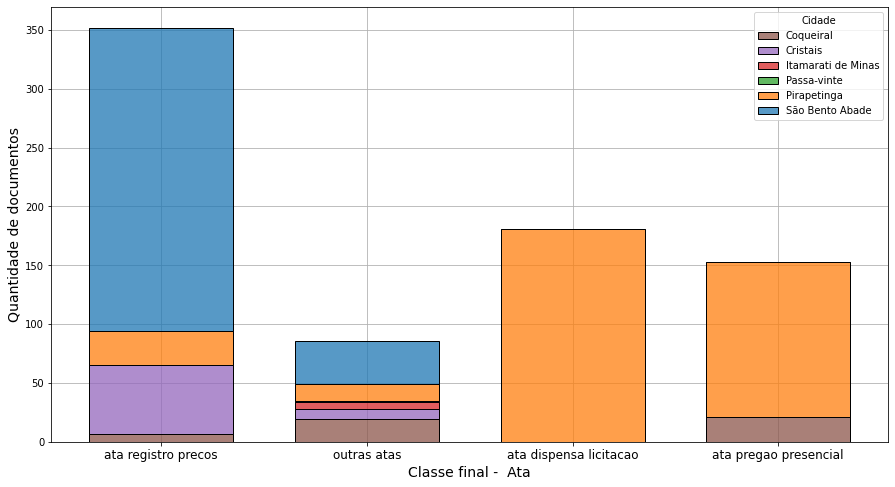

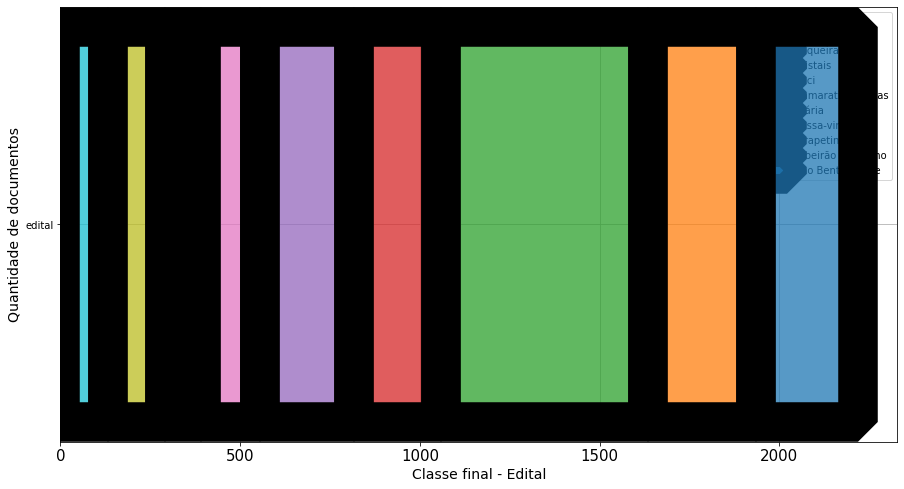

<Figure size 1080x576 with 0 Axes>

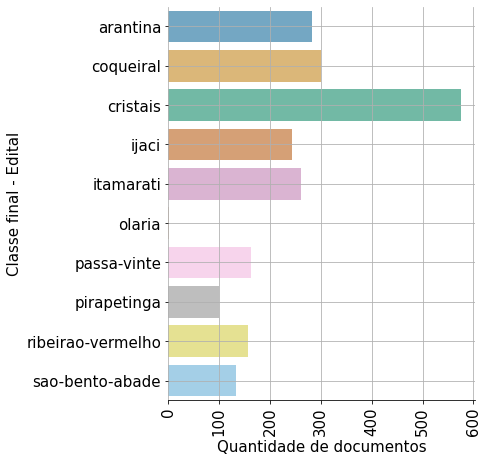

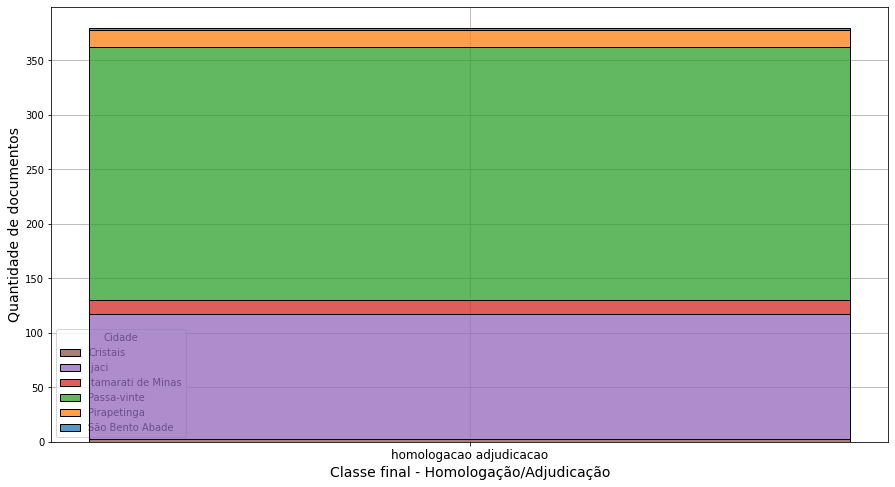

<Figure size 1080x576 with 0 Axes>

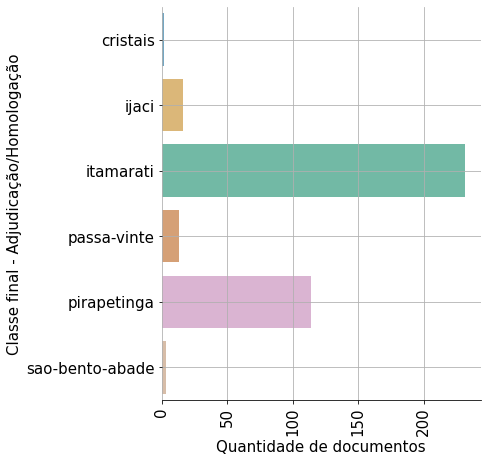

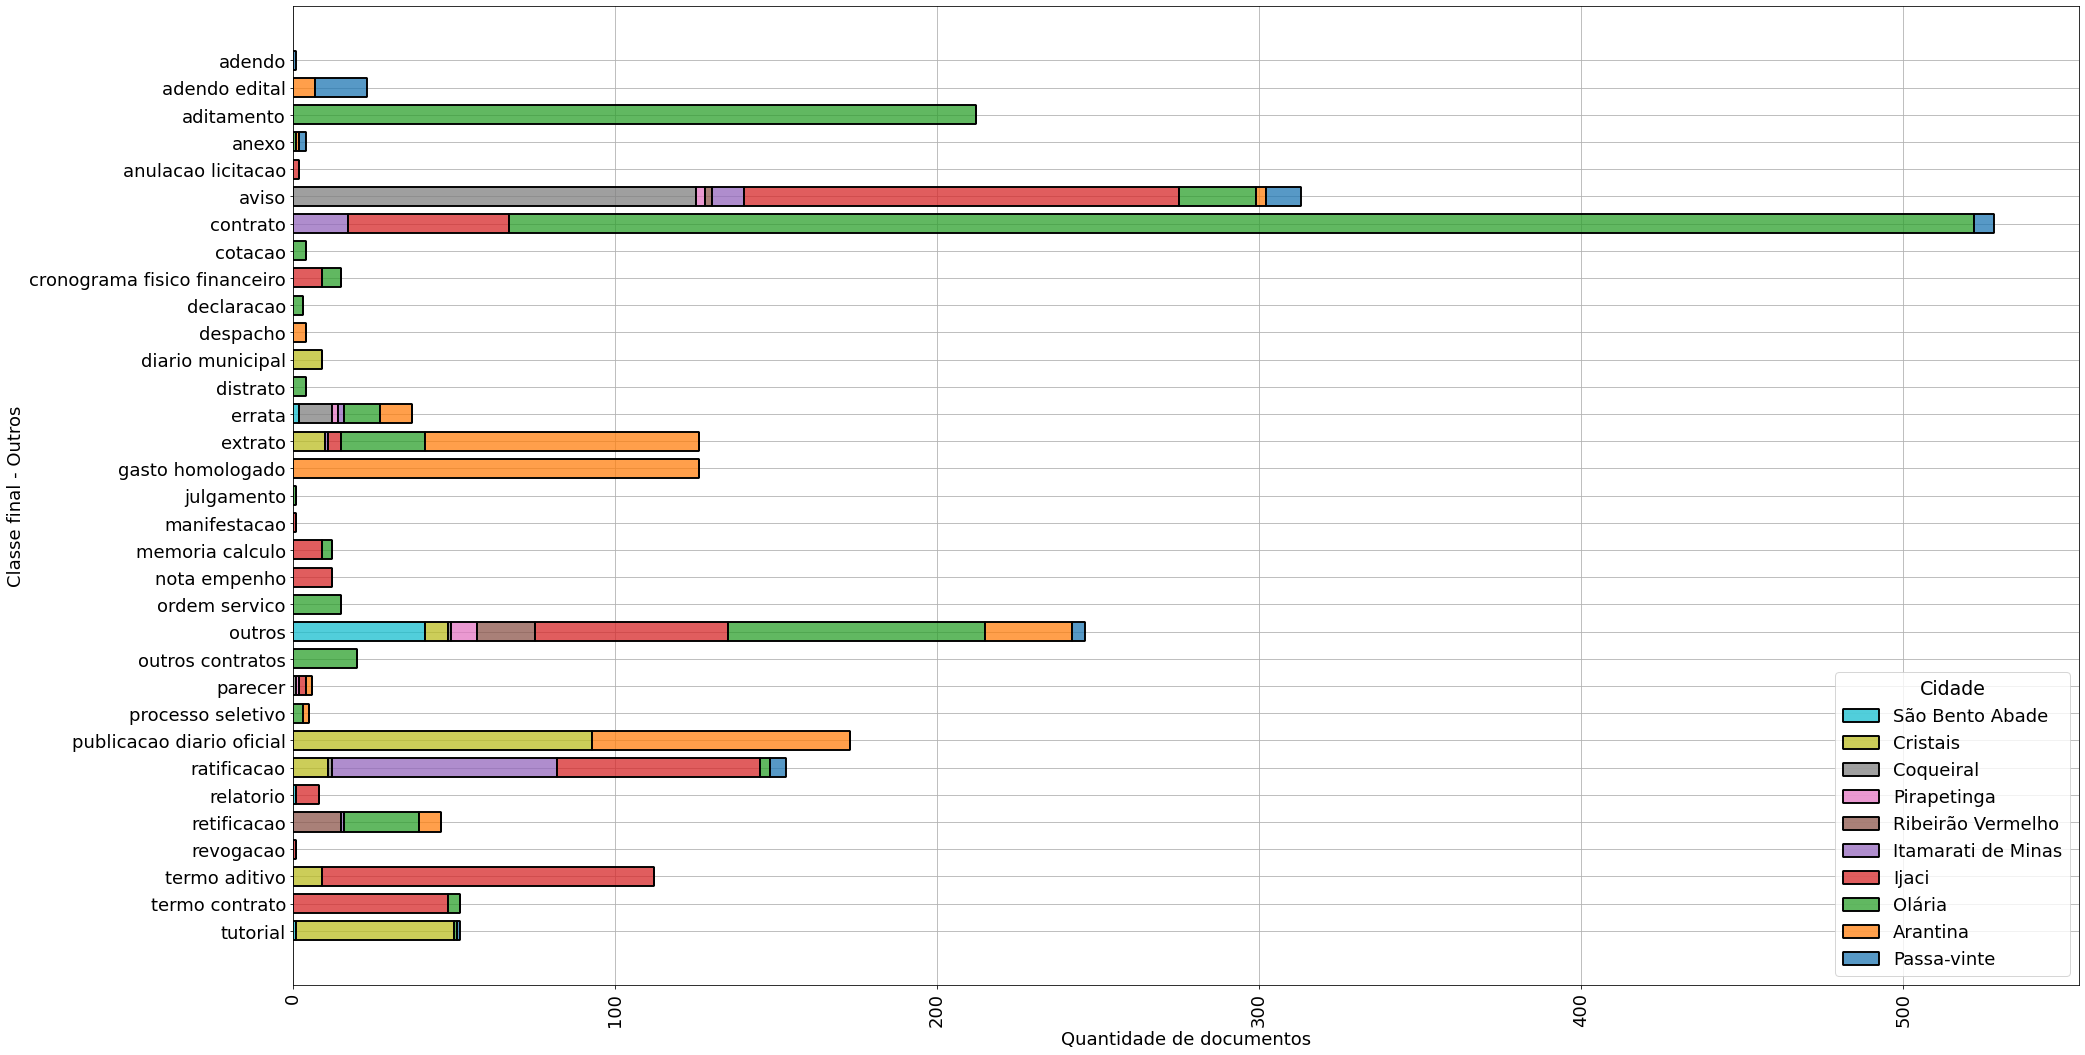

In [74]:
plot_bar_chat_classes(df_rotulos)

In [ ]:
def confunsion_matrix_chart(y_true_str, y_pred_str, title):

    df_cm = confusion_matrix(y_true_str, y_pred_str, normalize="true", labels=["Ata", "Edital", "Homologação", "Outros"])

    plt.figure(figsize = (15,8))
    
    cmap = sns.light_palette("#01706E", n_colors=7, as_cmap=True)

    #sns.color_palette("light:b", as_cmap=True)
    sns_plot = sns.heatmap(df_cm, annot=True,  annot_kws={"size": 16}, cmap=cmap, xticklabels=["Ata", "Edital", "Homologação", "Outros"], yticklabels=["Ata", "Edital", "Homologação", "Outros"])

    #sns_plot.set(xlabel="Label Predito", ylabel = "Label Verdadeiro")
    
    sns_plot.set_xlabel("Label Predito",fontsize=15)
    sns_plot.set_ylabel("Label Verdadeiro",fontsize=15)

    sns_plot = sns_plot.get_figure()
    
    plt.xticks(size=15)
    plt.yticks(size=15)

    sns_plot.savefig(path_dir+title+"2-meta-classe-consufionM.png", dpi=150)

In [ ]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return int(text)

def accuracy_fmeasure(y_true_str, y_pred_str):
    
    d = { "ATA": "1", "EDITAL": "2", "HOMOLOGAÇÃO": "3", "OUTROS": "4"}

    y_true = [replace_all(x.upper(), d) for x in y_true_str]

    y_pred = [replace_all(x.upper(), d) for x in y_pred_str]
    
    print("Acurácia: ", accuracy_score(y_true, y_pred))
    
    print("Macro F1: ", f1_score(y_true, y_pred, average='macro'))
    
    print("Average F1: ", f1_score(y_true, y_pred, average='weighted'))
    
    
    
    
    
        


In [ ]:
#file = main_path+"resultado_parcial.xlsx"
df_geral_meta = pd.DataFrame()
df_geral_real_meta = pd.DataFrame()

#wb = load_workbook(file)

#df_rotulos, df_classes, all_sheets = read_excel()

print(df_rotulos)

y_pred =[]
y_true = []

for aba in abas:
    
    if aba != "Classes_v2":
        df = df_rotulos[df_rotulos['city'] == aba]

        #print(aba)

        '''print(aba)

        ws = wb[aba]

        #Primeira célula na matriz não tem 
        #ws.cell(column=1, row=1, value="number")
        #wb.save(root_dir+"/"+"caracterizacao"+"/"+'caracterizacao_docs_'+str(sheet_name)+'.xlsx')


        #Lendo os dados da planilha e armazenando em um dataframe
        data = ws.values
        cols = next(data)[1:]
        data = list(data)
        #idx = [r[0] for r in data]
        data = (islice(r, 1, None) for r in data)
        print(data)
        df = pd.DataFrame(data, columns=['doc_id','title','city','all_matches','meta-class','real_meta-class','real_class','key_words','obs'])'''



        df['meta-class'] = df.apply(lambda row : str(row['meta-class']).title().strip() if str(row['meta-class']).strip().upper() not in ["HOMOLOG","HOMOLOGACAO","HOMOLOGAÇÃO"] else "Homologação", axis = 1)

        df_Mclass_aux = df.groupby(["meta-class"])["meta-class"].count()

        df_Mclass = df_Mclass_aux.to_frame().rename(columns={'meta-class':'level_0'}).reset_index()
        df_Mclass = df_Mclass.rename({'meta-class': 'class'}, axis=1)

        #print(df_real_class_manual["class"])

        #print(df_Mclass)

        #print(df_Mclass.sort_values('level_0', ascending = False)["class"])

        gera_graficos(df_Mclass, aba.title().replace("-", " "), "palavras-chave")

        df_geral_meta = df_geral_meta.append(df_Mclass, ignore_index=True)


        df['final_meta-class'] = df.apply(lambda row : str(row['final_meta-class']).title().strip() if row['final_meta-class'] is not None else "Não rotulado", axis = 1)
        df['final_meta-class'] = df.apply(lambda row : str(row['final_meta-class']).title().strip() if str(row['final_meta-class']).strip().upper() not in ["HOMOLOG","HOMOLOGACAO","HOMOLOGAÇÃO"] else "Homologação", axis = 1)

        df_real_Mclass_aux = df.groupby(["final_meta-class"])["final_meta-class"].count()

        df_real_Mclass = df_real_Mclass_aux.to_frame().rename(columns={'final_meta-class':'level_0'}).reset_index()
        df_real_Mclass = df_real_Mclass.rename({'final_meta-class': 'real_class'}, axis=1)

        #print(df_real_class_manual["class"])

        #print(df_real_Mclass)

        gera_graficos(df_real_Mclass, aba.title().replace("-", " "), "real")

        df_aux = pd.concat([df_Mclass_aux, df_real_Mclass_aux], keys=['Palavras-chave', 'Manual'])


        df_aux = df_aux.reset_index()

        #rint(df_aux)

        df_aux = df_aux.rename({'level_1': 'class'}, axis=1)  # new method
        df_aux = df_aux.rename({'meta-class': 'class'}, axis=1)  # new method

        #print(df_aux)

        gera_graficos_comparativo(df_aux, aba.title().replace("-", " "))
        
        print(df_aux[df_aux["level_0"] == "Palavras-chave"]["class"])
        
        print(df_aux[df_aux["level_0"] == "Manual"]["class"])
        
        confunsion_matrix_chart(df["final_meta-class"], df["meta-class"], aba)
        
        y_pred.append(df["meta-class"].to_list())
        y_true.append(df["final_meta-class"].to_list())


        df_geral_real_meta = df_geral_real_meta.append(df_real_Mclass, ignore_index=True)


y_true = functools.reduce(operator.iconcat, y_true, [])
y_pred = functools.reduce(operator.iconcat, y_pred, [])
'''df_geral_meta = df_geral_meta.groupby(['class'])['level_0'].agg('sum')
df_geral_meta = df_geral_meta.to_frame().rename(columns={'class':'level_0'}).reset_index()'''
#df_geral_meta = df_geral_meta.rename({'meta-class': 'class'}, axis=1)

#Leitura atualizada das meta-classes
path_classes_doc = "/dados01/workspace/ufmg.f01dcc/m03/business_understanding/notebooks/resultado_m03_meta_classes_extraction/relacao_documentos_label_v2.csv"
df_geral_meta = pd.read_csv(path_classes_doc) 

print("Dados atualizados...")
df_geral_meta = df_geral_meta.groupby(["final_meta-class"])["final_meta-class"].count()

df_geral_meta = df_geral_meta.to_frame().rename(columns={'final_meta-class':'level_0'}).reset_index()
df_geral_meta = df_geral_meta.rename({'final_meta-class': 'real_class'}, axis=1)


print(df_geral_meta.head())

gera_graficos(df_geral_meta, "Geral", "real")

'''gera_graficos(df_geral_meta, "Geral", "palavras-chave")

df_geral_real_meta = df_geral_real_meta.groupby(['real_class'])['level_0'].agg('sum')
df_geral_real_meta = df_geral_real_meta.to_frame().rename(columns={'real_class':'level_0'}).reset_index()

gera_graficos(df_geral_real_meta, "Geral", "real")'''

confunsion_matrix_chart(y_true, y_pred, "Geral")

accuracy_fmeasure(y_true, y_pred)

    

# 